In [11]:
import dash                                # pip install dash
from dash import dcc
from dash import html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc    # pip install dash-bootstrap-components
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from alpha_vantage.timeseries import TimeSeries # pip install alpha-vantage
from pprint import pprint



In [ ]:
# ts = TimeSeries(key='0Q466LJ33OMBCN3O', output_format='pandas')
# data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
# pprint(data.head(2))

In [ ]:
ts = TimeSeries(key='0Q466LJ33OMBCN3O', output_format='pandas') # 'pandas' or 'json' or 'csv' 从api中提取pandas格式的时间序列

In [13]:
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact') # 这是我们从api中提取的地方，intraday就是当天的数据，TTM是我们拉取的公司股票，设置每一分钟拉动一次，当然我们只会拉取400行的数据

In [ ]:
df = data.copy()
df=df.transpose() # 然后是转置，重命名，合并
df.rename(index={"1. open":"open", "2. high":"high", "3. low":"low",
                 "4. close":"close","5. volume":"volume"},inplace=True)
df=df.reset_index().rename(columns={'index': 'indicator'})
df = pd.melt(df,id_vars=['indicator'],var_name='date',value_name='rate')
df = df[df['indicator']!='volume'] # 这里给主列重命名，这些都是为了更容易去进行绘图和方便后面dash的操作
print(df.head()) # 这上面就是我们调用api获取数据，顺带做了下清洗的步骤，回头我会把代码放出来，清洗的步骤不是必要的，大家参考下

In [ ]:
df.to_csv("data.csv", index=False) # 最后建议大家还是把上面打印的数据保存到本地，因为如果你构建dash之后，每次点击刷新网页，都会对你的api和应用程序产生负担。
#每人只能申请五个免费api，每分钟只能请求一次，所以我们调用一次api之后，存到本地，然后用dash从csv中拉取数据就能避免api使用过多。
exit()

In [1]:
import palettable
from palettable.cartocolors.qualitative import Bold_9
 
#为了描述方便，此处直接倒入palettable.cartocolors.qualitative大类下的Bold_9小类，
#实际使用时可直接用palettable.cartocolors.qualitative.Bold_9

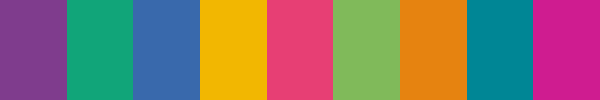

In [2]:
Bold_9.show_discrete_image()#Bold_9各种颜色条图片


/Users/jackchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/jackchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/jackchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/jackchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/jackchen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (6) than needed (3), which may

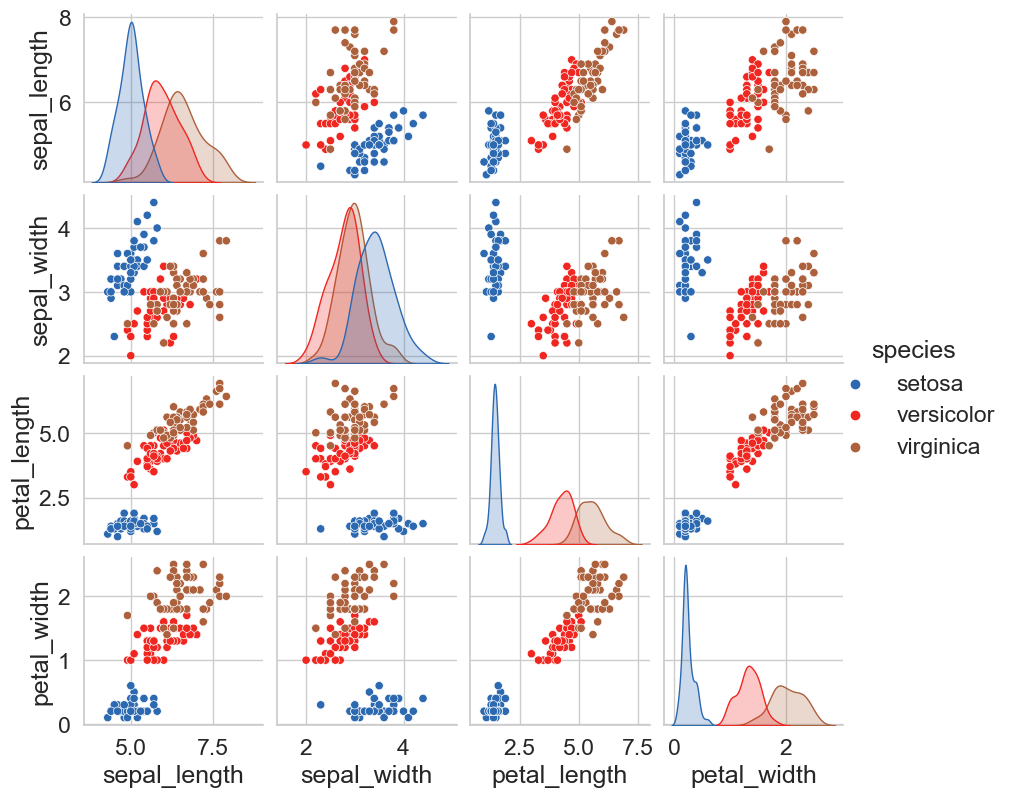

In [5]:
import seaborn as sns
iris_sns = sns.load_dataset("iris")
 
import palettable
 
g = sns.pairplot(
    iris_sns,
    hue='species',
    palette=palettable.tableau.BlueRed_6.mpl_colors,  #Matplotlib颜色
)
sns.set(style='whitegrid')
g.fig.set_size_inches(10, 8)
sns.set(style='whitegrid', font_scale=1.5)

In [6]:
from haishoku.haishoku import Haishoku


In [8]:
image='./google.png'
haishoku = Haishoku.loadHaishoku(image)
haishoku.palette  

[(0.87, (253, 253, 252)),
 (0.06, (74, 132, 229)),
 (0.03, (220, 71, 59)),
 (0.01, (240, 192, 27)),
 (0.01, (244, 186, 21)),
 (0.01, (134, 170, 217)),
 (0.01, (52, 159, 80)),
 (0.01, (219, 149, 139))]

In [12]:
haishoku.showPalette(image)

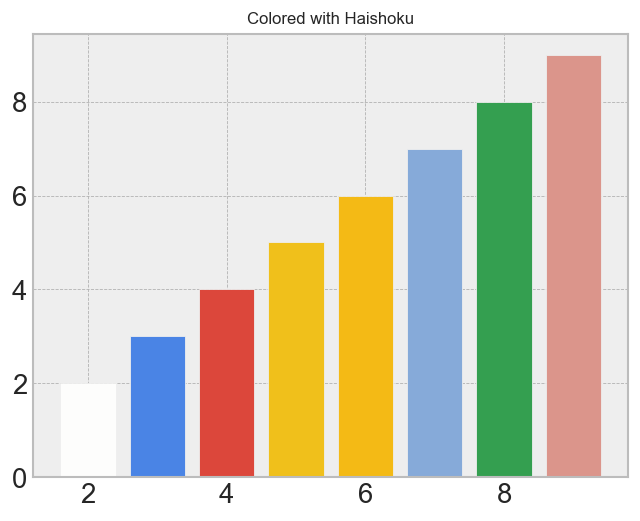

In [11]:
import matplotlib.pyplot as plt
 
rgb_list = [[i[1][0] / 255, i[1][1] / 255, i[1][2] / 255]
            for i in haishoku.palette] #色号简单转化为matplotlib可用的0～1之间RGB色号
plt.figure(dpi=120)
plt.style.use('bmh')
plt.bar(range(2, 10), range(2, 10), color=rgb_list)  #传入Haishoku提取的颜色号
plt.title('Colored with Haishoku', size=10)
plt.show()